<a href="https://colab.research.google.com/github/adelardw/Classification-and-NLP-problem/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fullnamecorrection","key":"04174ef12a2ae4fe42e99083eb4777b2"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datatattle/email-classification-nlp
!unzip /content/email-classification-nlp.zip

  0% 0.00/46.8k [00:00<?, ?B/s]
100% 46.8k/46.8k [00:00<00:00, 85.1MB/s]
Archive:  /content/email-classification-nlp.zip
  inflating: SMS_test.csv            
  inflating: SMS_train.csv           


In [ ]:
df_train = pd.read_csv('/content/SMS_train.csv',encoding='cp1252')
df_test = pd.read_csv('/content/SMS_test.csv',encoding='cp1252')


In [ ]:
data = pd.concat((df_train,df_test))
data.drop(columns = ['S. No.'],inplace = True)
idx = np.arange(len(data))
data.set_index(idx,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1081
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  1082 non-null   object
 1   Label         1082 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB


(-0.5, 399.5, 199.5, -0.5)

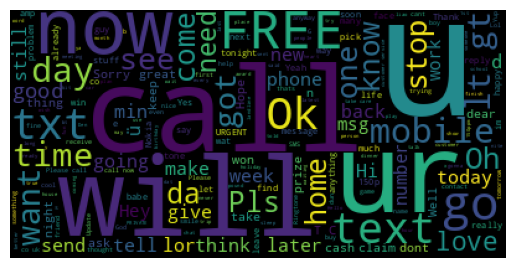

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['Message_body'])
cloud = WordCloud().generate(text)
plt.imshow(cloud)

plt.axis('off')

In [ ]:
messages = data['Message_body'].to_numpy()

In [ ]:
import nltk

import math
from nltk.corpus import stopwords
nltk.download('stopwords')

sw = stopwords.words('english')
ascii = 'abcdefghijklmnopqrstuvwxyz' + ' '
my_stopwordss = ['am','im', 'is','is', 'its','you','ll','u','we' 'will', 'be', 'but', 'some', 'it','in','i',
              'a','pm', 'upgrade', 'for','x','f','b','d','j','k','l','m','id','and','o','e','g','h','to','the',
              'this', 'its','ok','he','us','that','by','he ','ur','she','do','are','your','at','you','so','me','my','to','we','will','like','have',
              'oh','was','were','ltgt','da','www','ur','c','d','f','j','k','l','m','n','o','p','q','r','s','t','w','y','z','nd','td','th','ed','ing','ill','we ll',
              'ull','must','should']


def cleaning(data):
  new_data = []
  for txt in data:
    txt = txt.lower()
    new_txt = ''.join(filter(lambda x: x in ascii,txt))
    new_data.append(new_txt)

  return new_data

def storwords_(data,stopwords):
  new_data = []
  for txt in data:
      txt = txt.split()
      for words in stopwords:
        while words in txt:
            txt.remove(words)
      new = ' '.join(txt)
      new_data.append(new)

  return new_data

def term_frequency(word,data):
  q = 0
  for words in data:
    words = words.split()
    n = len(words)
    for ex in words:
      if ex == word:
        q +=1
  return q/n

def idf(word,data):
  n = len(data)
  q = 0
  for document in data:
      if word in document:
        q += 1
  try:
      idf = math.log(n/q)
      return idf
  except ZeroDivisionError:
    print('No words')

def tf_idf(word,data):
  tf = term_frequency(word,data)
  idf_ = idf(word,data)
  if type(idf_) == float:
      return tf * idf_

def summary_words(data):
  dict_4_words = {}
  tfidf_words = {}
  for docs in data:
    docs = docs.split()
    for words in docs:
      if words not in dict_4_words:
        dict_4_words[words] = 1
      else:
        dict_4_words[words] += 1
      tfidf_words[words] = tf_idf(words,data)

  return dict_4_words,tfidf_words

print("TF-IDF (all data)",'\n', summary_words(storwords_(cleaning(messages),stopwords= my_stopwordss))[1],'\n')
print("Summary words",'\n', summary_words(storwords_(cleaning(messages),stopwords= my_stopwordss))[0])

nltk_data = data.copy()

nltk_data['Message_body'] = storwords_(cleaning(messages),stopwords= sw)
nltk_data['Label'].replace( ('Non-Spam','Spam'),(0,1),inplace = True)

data['Message_body'] = storwords_(cleaning(messages),stopwords= my_stopwordss)
data['Label'].replace( ('Non-Spam','Spam'),(0,1),inplace = True)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF (all data) 
 {'rofl': 0.9980809227723466, 'true': 4.907124917726591, 'name': 8.360225360719935, 'guy': 4.278516258304217, 'did': 9.746690523369175, 'bitching': 0.9980809227723466, 'acted': 1.6822726202109477, 'interested': 2.4001166135513725, 'buying': 3.3645452404218954, 'something': 8.84323420388978, 'else': 5.040656310351114, 'next': 10.233945933118996, 'week': 13.26698970559383, 'gave': 3.2001554847351636, 'free': 29.49064237295536, 'pity': 0.9980809227723466, 'mood': 0.9980809227723466, 'soany': 0.9980809227723466, 'other': 6.806095041900634, 'suggestions': 0.9980809227723466, 'going': 15.44651824573763, 'esplanade': 1.7981197939561373, 'fr': 0.25782612987347736, 'home': 15.954554962011184, 'time': 17.875399645043736, 'tried': 5.040656310351114, 'contact': 11.686572018144332, 'won': 10.209142562850952, 'pound': 1.368383394877202, 'prize': 13.84860256514408, 'claim': 17.50138725060163, 'easy': 5.608142763116104, 'call': 40.92385753321327, 'now': 28.442215867479426, 'only': 2

(-0.5, 399.5, 199.5, -0.5)

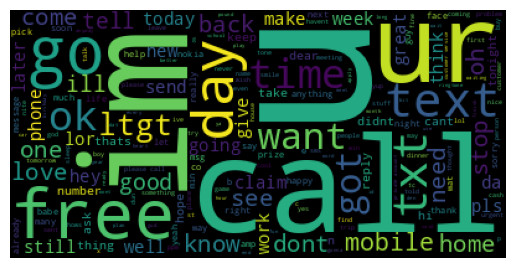

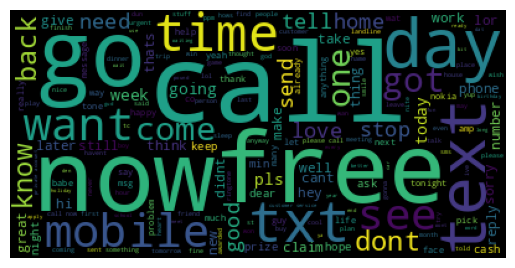

In [ ]:
text_nltk = ' '.join(nltk_data['Message_body'])
cloud_nltk = WordCloud().generate(text_nltk)

text = ' '.join(data['Message_body'])
cloud = WordCloud().generate(text)

plt.figure(1)
plt.imshow(cloud_nltk)
plt.axis('off')
plt.figure(2)

plt.imshow(cloud)
plt.axis('off')

In [ ]:
from pandas._libs.tslibs import vectorized
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, mean_absolute_error, recall_score, precision_score, f1_score

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message_body'].to_numpy())
y = data['Label'].to_numpy()


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify = y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
recall =  recall_score(y_test, y_pred)
pression = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'MSE = {mse}\n',f'Accuracy = {acc}\n',f'Recall = {recall}\n',f'Pression = {pression}\n',f'F1 = {f1}')

MSE = 0.033210332103321034
 Accuracy = 0.966789667896679
 Recall = 0.84
 Pression = 0.9767441860465116
 F1 = 0.9032258064516129


In [ ]:
''' NLTK FIT'''
X_nltk = vectorizer.fit_transform(nltk_data['Message_body'].to_numpy())
y_nltk = nltk_data['Label'].to_numpy()


Xn_train,Xn_test,yn_train,yn_test = train_test_split(X_nltk,y_nltk,random_state = 42, stratify = y)

modeln = LogisticRegression()
modeln.fit(Xn_train,yn_train)
y_predn = modeln.predict(Xn_test)

accn = accuracy_score(yn_test, y_predn)
msen = mean_absolute_error(yn_test, y_predn)
recalln =  recall_score(yn_test, y_predn)
pressionn = precision_score(yn_test, y_predn)
f1n = f1_score(yn_test, y_predn)
print(f'MSE = {msen}\n',f'Accuracy = {accn}\n',f'Recall = {recalln}\n',f'Pression = {pressionn}\n',f'F1 = {f1n}')

MSE = 0.055350553505535055
 Accuracy = 0.9446494464944649
 Recall = 0.76
 Pression = 0.926829268292683
 F1 = 0.8351648351648352
